In [1]:
from pathlib import Path

from numpy import pi as π

import example_speaker_arrays as esa
import optimize_dome as od
import program_channels as pc
import localization_models as lm

import numpy as np

# %% globals

try:
    _here = Path(__file__).parent
except NameError as ne:
    import os
    _here = Path(os.getcwd())
print(_here)

/Users/heller/Documents/adt_evaluation


In [2]:
# set elevation limits

# optimization 
el_lim = np.array((-60, 60)) * np.pi / 180

# evaluation
eval_el_lim = np.array((-89, 89)) * np.pi / 180

quiet = False

In [3]:
def make_decoder(C, S, el_lim, eval_el_lim):
    M_hf, result_dict_hf = od.optimize_dome(
            S,
            ambisonic_order=C,
            # eval_order=C,
            sparseness_penalty=0,
            el_lim=el_lim,
            do_report=True,
            random_start=False,
            eval_el_lim=eval_el_lim,
            quiet=quiet,
        )
    M_lf, result_dict_lf = od.optimize_dome_LF(
            M_hf,
            S.real_only(),
            ambisonic_order=C,
            el_lim=el_lim,
        )
    return M_hf, M_lf, result_dict_hf, result_dict_lf
    

ac: AER
ac: AER
SphericalData(Amb8) SphericalData(Amb8)
ac: AER
SphericalData(CMAP-8c8s4c) SphericalData(Amb4)
ac: XZY
SphericalData(CMAP-8c8s4c) SphericalData(imaginary speaker at nadir)
ac: XZY
SphericalData(CMAP-8c8s4c) SphericalData(imaginary speaker at zenith)


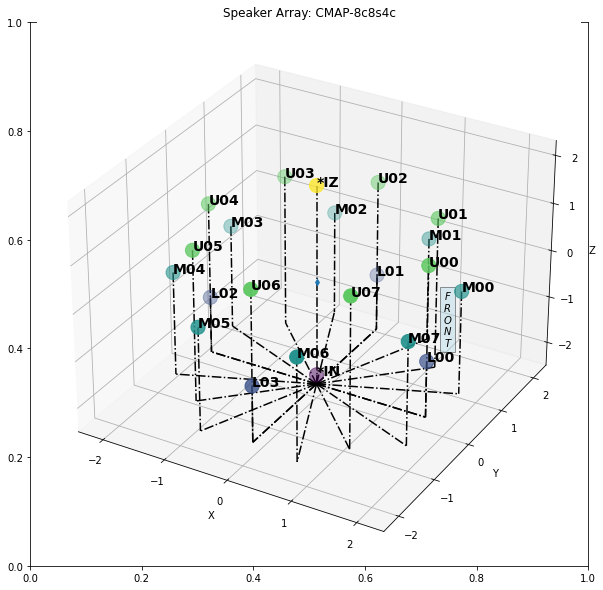

/Users/heller/Documents/adt_evaluation/plot_utils.py:146: UserWarning: Matplotlib is currently using module://ipympl.backend_nbagg, which is a non-GUI backend, so cannot show the figure.
  fig.show()


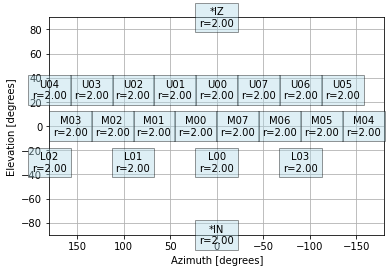

In [5]:
#%matplotlib tk
#%matplotlib ipympl

S = esa.emb_cmap884()
S.plot3D(show=True)
S.plot_azel(show=True)

do = enumerate((ho, vo) for ho in range(1,4) for vo in range(1, ho+1))

def run_it():
    try:
        i, (ho, vo) = next(do)
    except StopIteration:
        print("Done!")
    else:
        C = pc.ChannelsAmbiX(ho, vo)

        print(f"\n\n {i} ------ {S.description} : {C.id_string()}\n\n")

        M_hf, M_lf, result_dict_hf, result_dict_lf = make_decoder(C, S, el_lim, eval_el_lim)
        lm.plot_performance_LF(M_lf, M_hf, S.real_only().u.T, C.sh_l, C.sh_m)


In [22]:
import pandas as pd
pd.DataFrame(S.real_only().sph).T

0         1    2
0   0.392699  0.000000  2.0
1   1.178097  0.000000  2.0
2   1.963495  0.000000  2.0
3   2.748894  0.000000  2.0
4  -2.748894  0.000000  2.0
5  -1.963495  0.000000  2.0
6  -1.178097  0.000000  2.0
7  -0.392699  0.000000  2.0
8   0.000000  0.523599  2.0
9   0.785398  0.523599  2.0
10  1.570796  0.523599  2.0
11  2.356194  0.523599  2.0
12  3.141593  0.523599  2.0
13 -2.356194  0.523599  2.0
14 -1.570796  0.523599  2.0
15 -0.785398  0.523599  2.0
16  0.000000 -0.523599  2.0
17  1.570796 -0.523599  2.0
18  3.141593 -0.523599  2.0
19 -1.570796 -0.523599  2.0



 0 ------ EMB's home array, 8+8+4 : 1H1V ACN SN3D


speaker array =  CMAP-8c8s4c


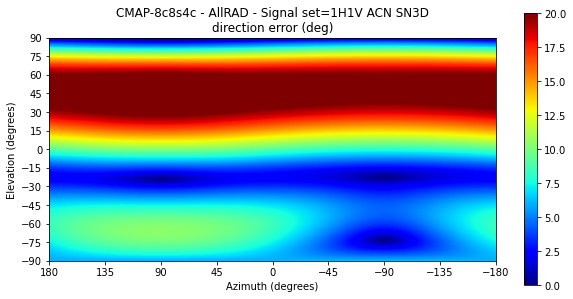

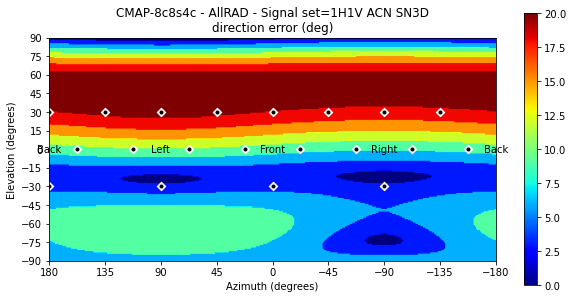

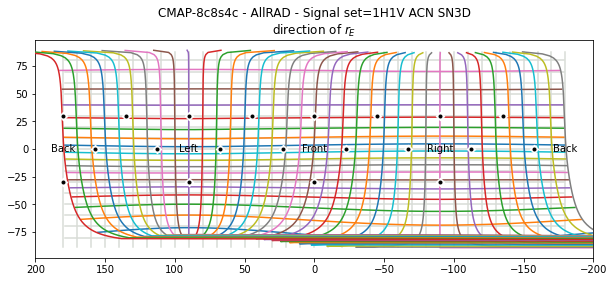

(361, 181) (361, 181) (361, 181)


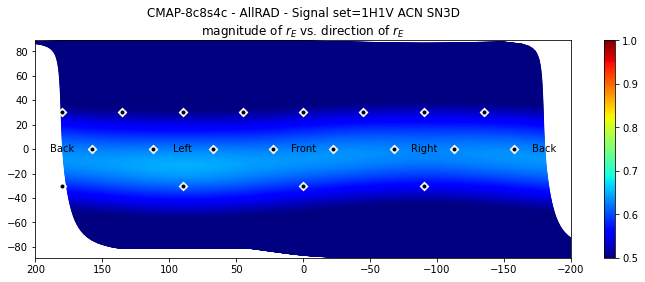

(361, 181) (361, 181) (361, 181)


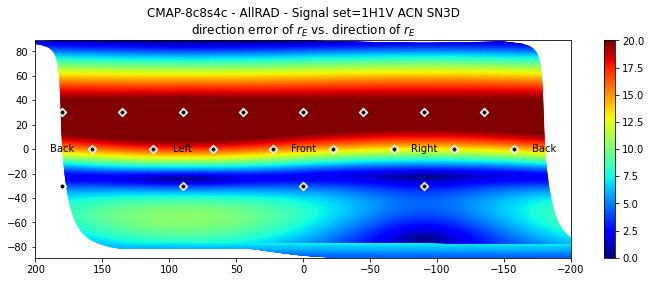

(361, 181) (361, 181) (361, 181)


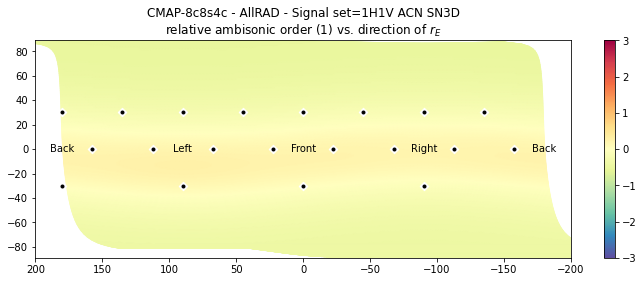

(361, 181) (361, 181) (361, 181)


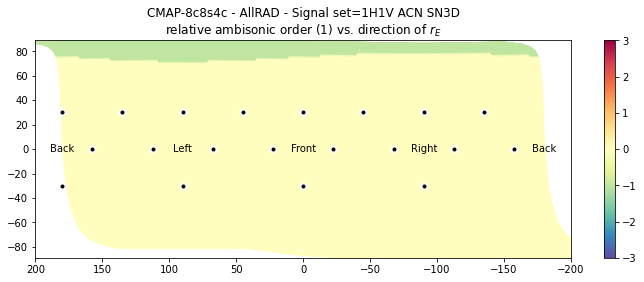

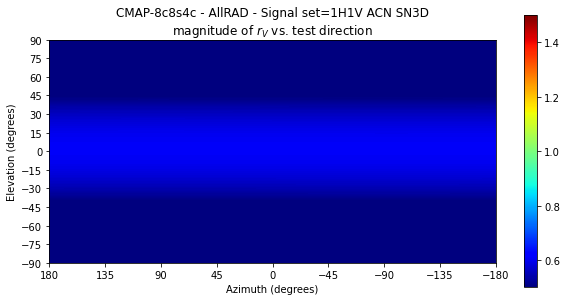

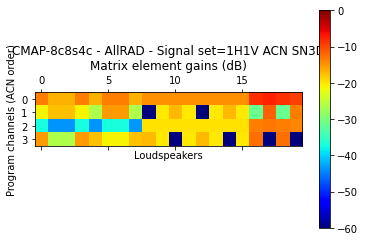



CMAP-8c8s4c - AllRAD - Signal set=1H1V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -8.05 |===================================================
M01:  -11.04 |================================================
M02:  -11.04 |================================================
M03:   -8.05 |===================================================
M04:  -11.04 |================================================
M05:   -8.05 |===================================================
M06:   -8.05 |===================================================
M07:  -11.04 |================================================
U00:   -9.14 |==================================================
U01:   -9.14 |==================================================
U02:   -9.14 |==================================================
U03:   -9.14 |==================================================
U04:   -9.14 |==================================================
U05:   -9.14 |==================================================


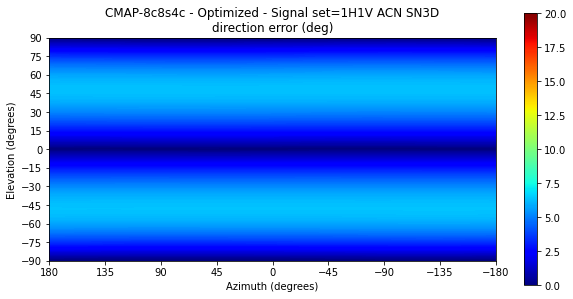

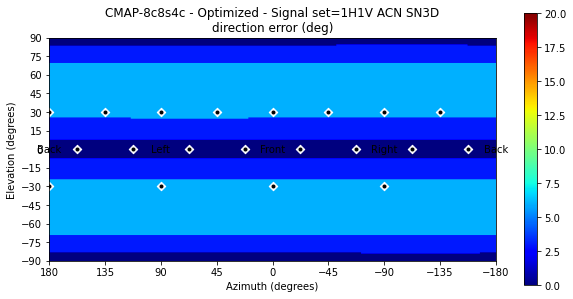

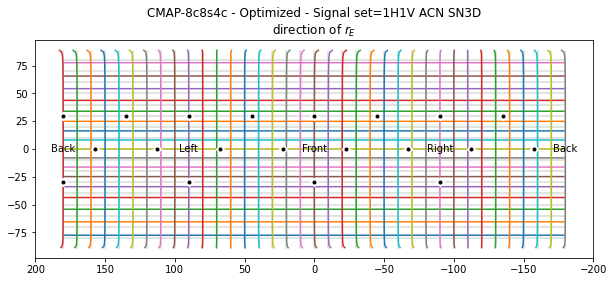

(361, 181) (361, 181) (361, 181)


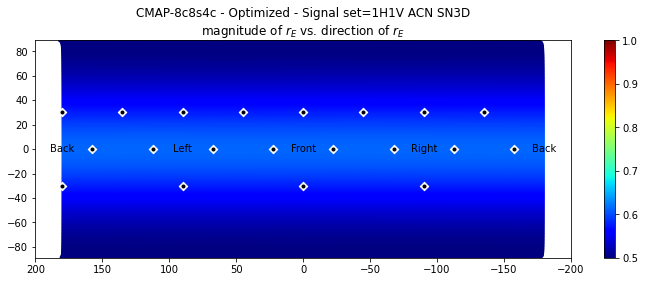

(361, 181) (361, 181) (361, 181)


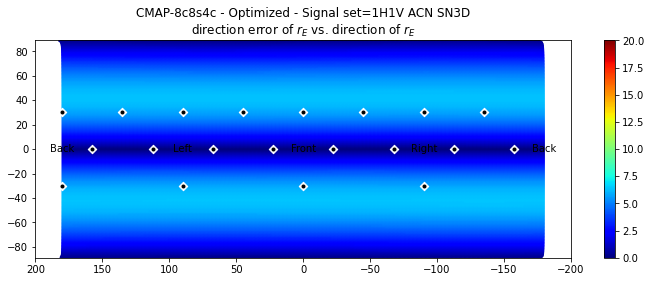

(361, 181) (361, 181) (361, 181)


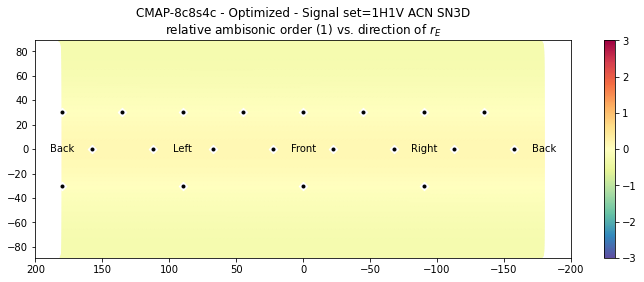

(361, 181) (361, 181) (361, 181)


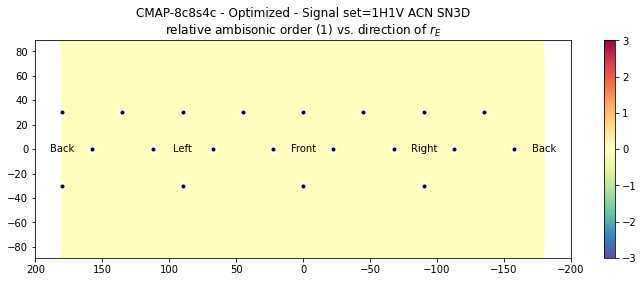

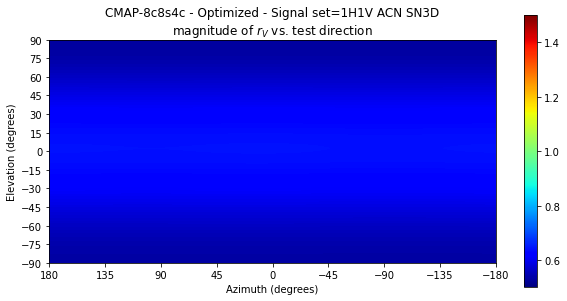

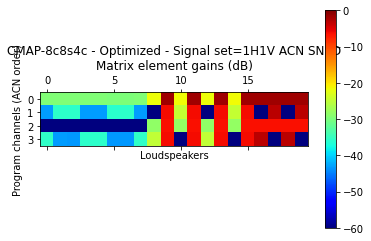

2022-12-05 12:20:35

 ambisonic_order = 1
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:  -28.54 |===============================
M01:  -28.57 |===============================
M02:  -28.63 |===============================
M03:  -28.56 |===============================
M04:  -28.57 |===============================
M05:  -28.70 |===============================
M06:  -28.66 |===============================
M07:  -28.49 |===============================
U00:  -19.45 |========================================
U01:    1.37 |=============================================================
U02:  -19.20 |========================================
U03:    1.37 |=============================================================
U04:  -19.49 |========================================
U05

 This problem is unconstrained.


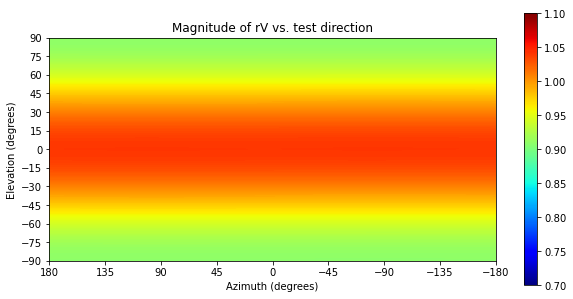

mean rV/rE direction error 1.5507590949073475


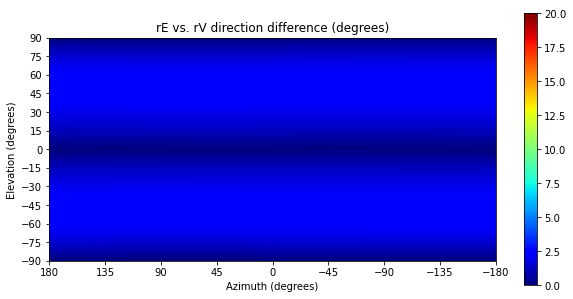

In [6]:
run_it()



 1 ------ EMB's home array, 8+8+4 : 2H1V ACN SN3D


speaker array =  CMAP-8c8s4c


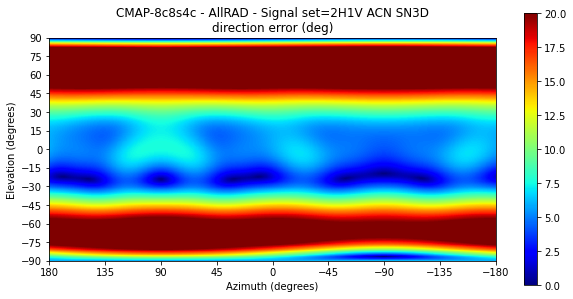

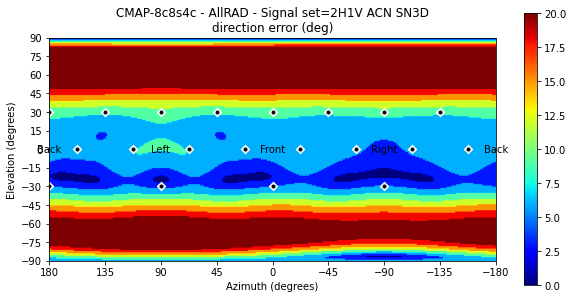

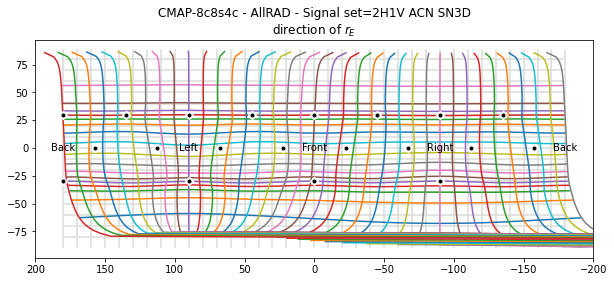

(361, 181) (361, 181) (361, 181)


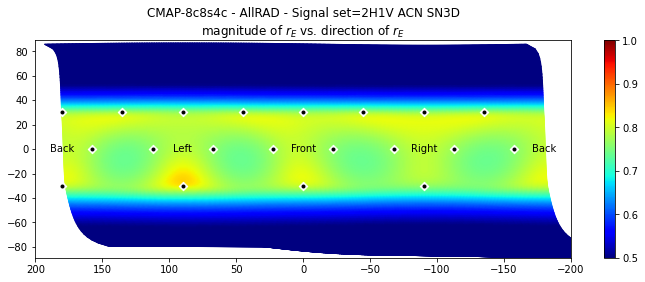

(361, 181) (361, 181) (361, 181)


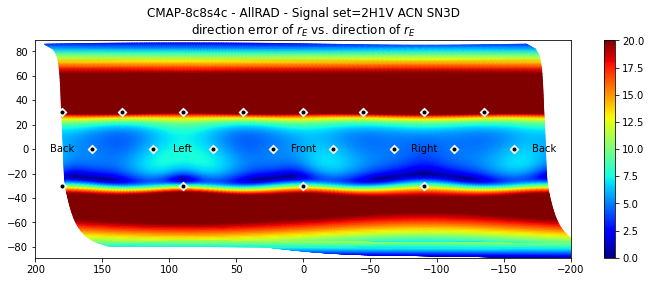

(361, 181) (361, 181) (361, 181)


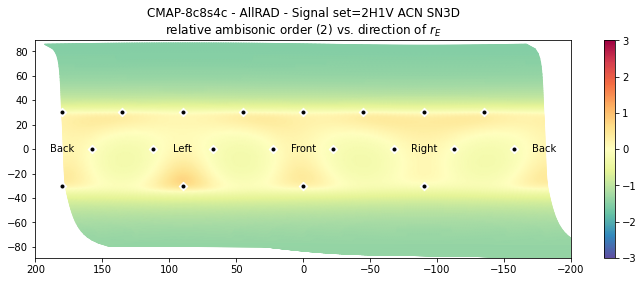

(361, 181) (361, 181) (361, 181)


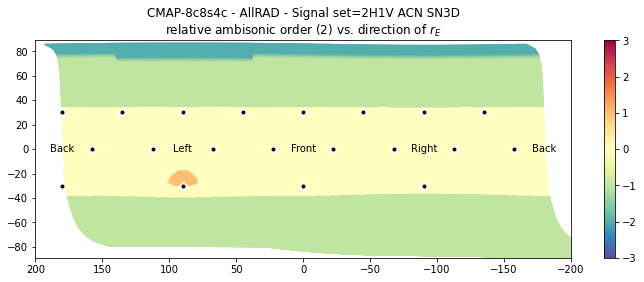

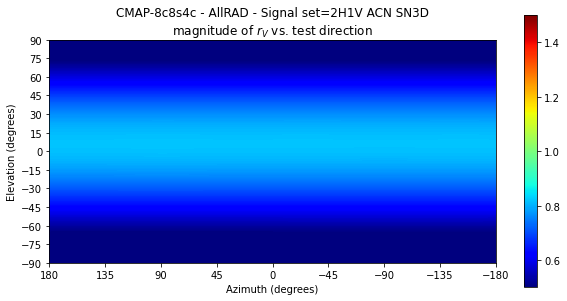

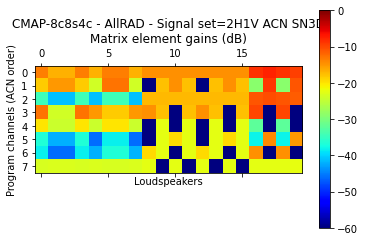



CMAP-8c8s4c - AllRAD - Signal set=2H1V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -6.02 |=====================================================
M01:   -8.77 |===================================================
M02:   -8.77 |===================================================
M03:   -6.02 |=====================================================
M04:   -8.77 |===================================================
M05:   -6.02 |=====================================================
M06:   -6.02 |=====================================================
M07:   -8.77 |===================================================
U00:   -6.37 |=====================================================
U01:   -6.37 |=====================================================
U02:   -6.37 |=====================================================
U03:   -6.37 |=====================================================
U04:   -6.37 |=====================================================
U05:   -6.37 |================

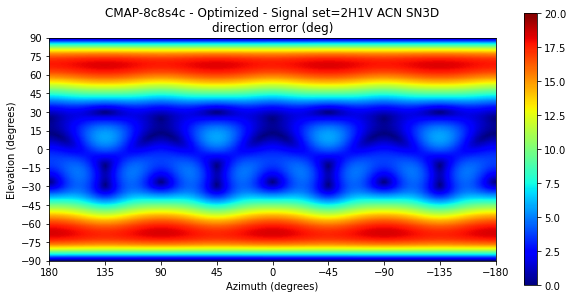

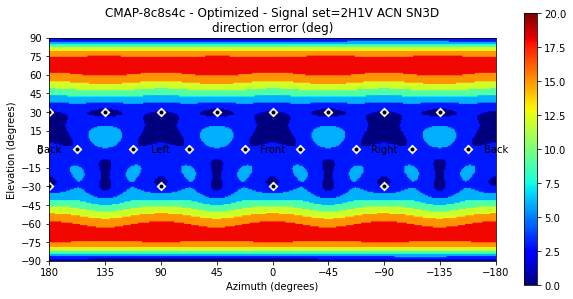

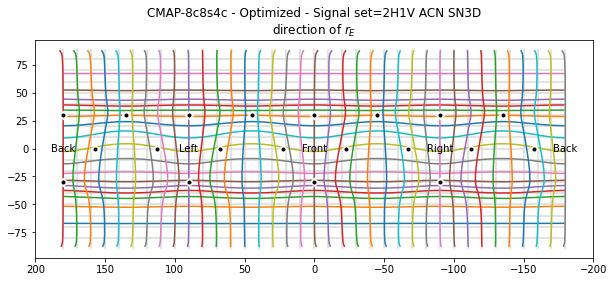

(361, 181) (361, 181) (361, 181)


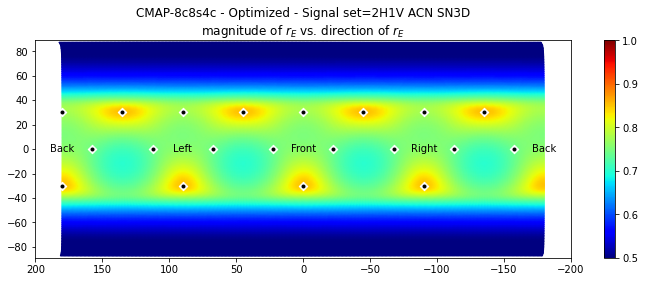

(361, 181) (361, 181) (361, 181)


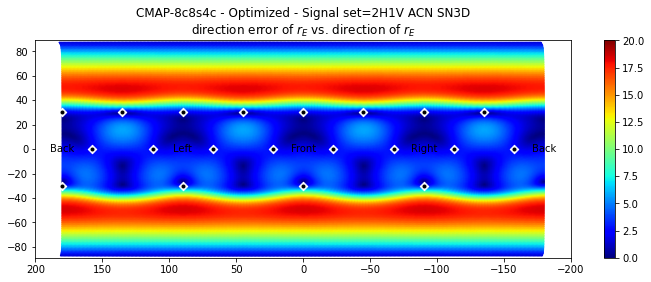

(361, 181) (361, 181) (361, 181)


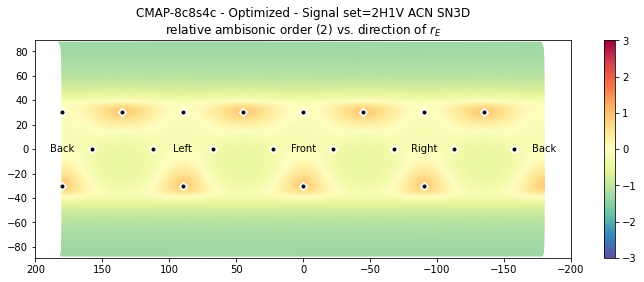

(361, 181) (361, 181) (361, 181)


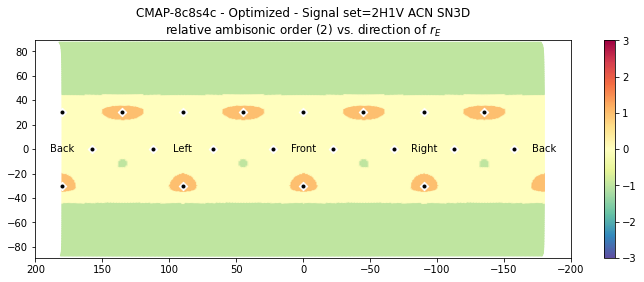

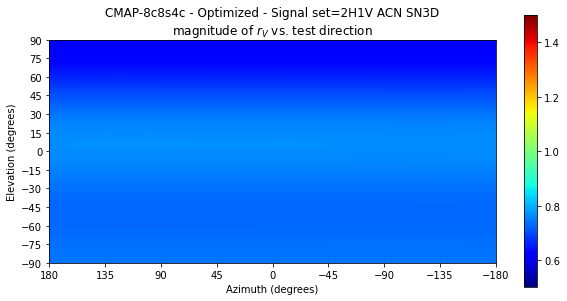

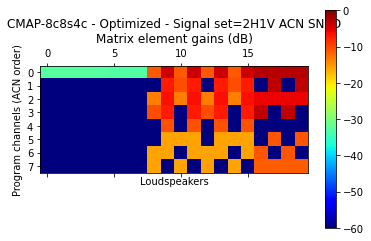

2022-12-05 12:20:54

 ambisonic_order = 2
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:  -32.78 |===========================
M01:  -32.77 |===========================
M02:  -32.79 |===========================
M03:  -32.79 |===========================
M04:  -32.80 |===========================
M05:  -32.85 |===========================
M06:  -32.86 |===========================
M07:  -32.80 |===========================
U00:   -5.76 |======================================================
U01:    0.51 |============================================================
U02:   -5.76 |======================================================
U03:    0.51 |============================================================
U04:   -5.73 |==================================================

 This problem is unconstrained.


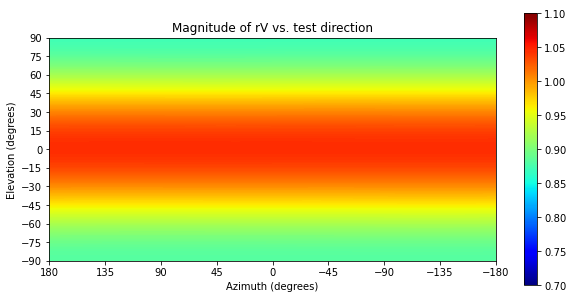

mean rV/rE direction error 6.859739403639463


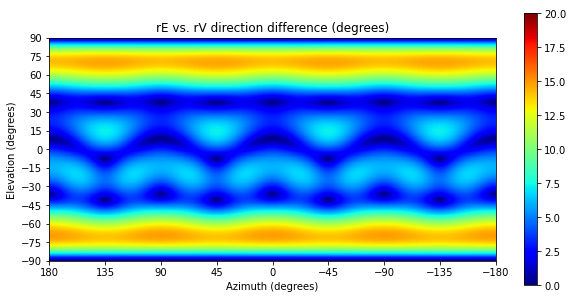

In [7]:
run_it()



 2 ------ EMB's home array, 8+8+4 : 2H2V ACN SN3D


speaker array =  CMAP-8c8s4c


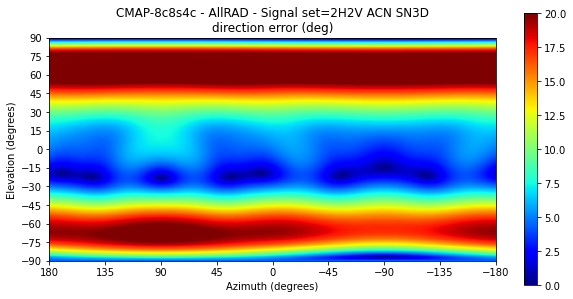

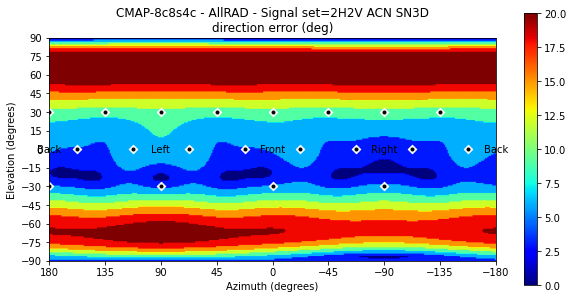

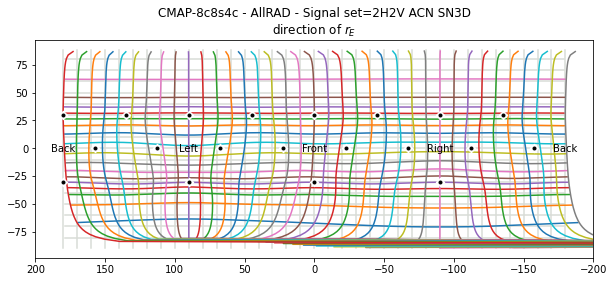

(361, 181) (361, 181) (361, 181)


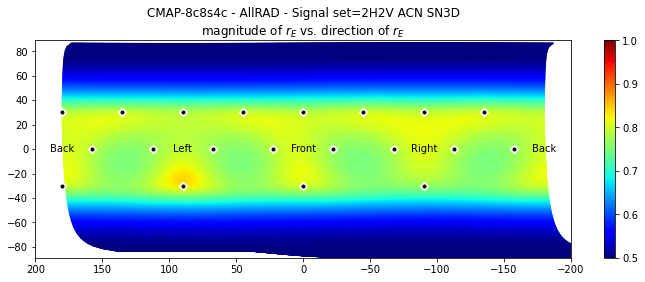

(361, 181) (361, 181) (361, 181)


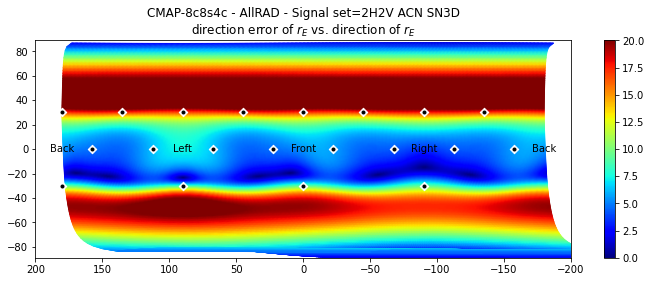

(361, 181) (361, 181) (361, 181)


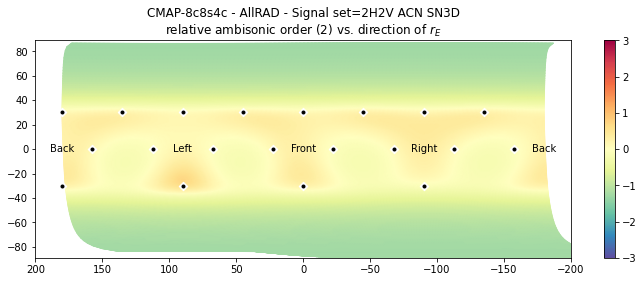

(361, 181) (361, 181) (361, 181)


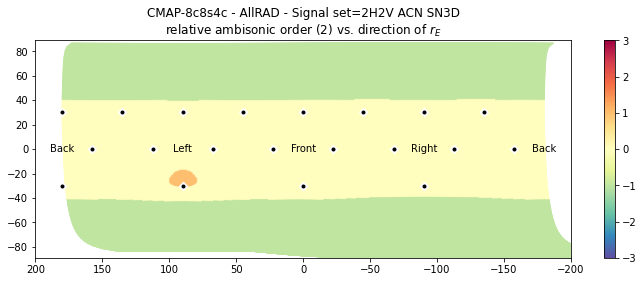

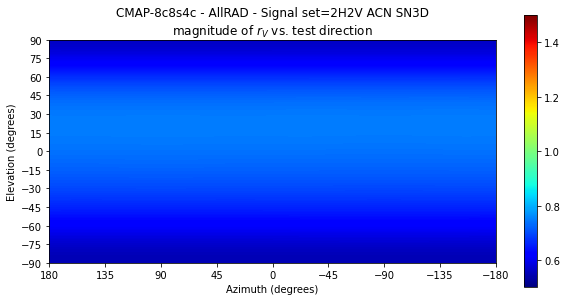

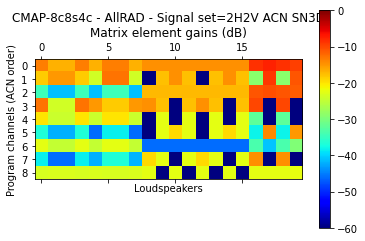



CMAP-8c8s4c - AllRAD - Signal set=2H2V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -5.43 |======================================================
M01:   -8.14 |===================================================
M02:   -8.14 |===================================================
M03:   -5.43 |======================================================
M04:   -8.13 |===================================================
M05:   -5.43 |======================================================
M06:   -5.43 |======================================================
M07:   -8.13 |===================================================
U00:   -6.37 |=====================================================
U01:   -6.37 |=====================================================
U02:   -6.37 |=====================================================
U03:   -6.37 |=====================================================
U04:   -6.37 |=====================================================
U05:   -6.37 |============

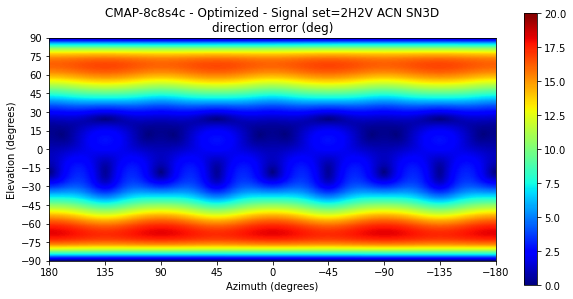

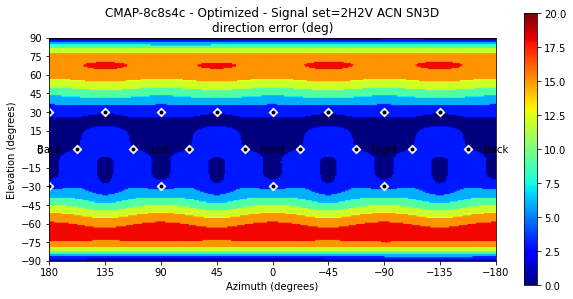

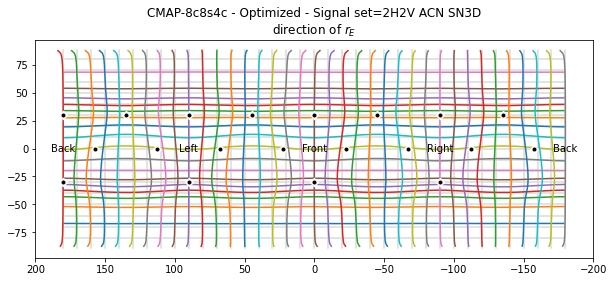

(361, 181) (361, 181) (361, 181)


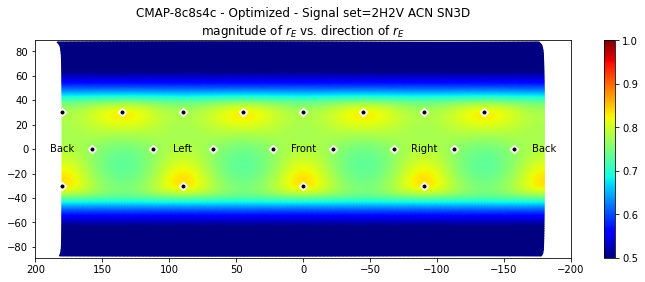

(361, 181) (361, 181) (361, 181)


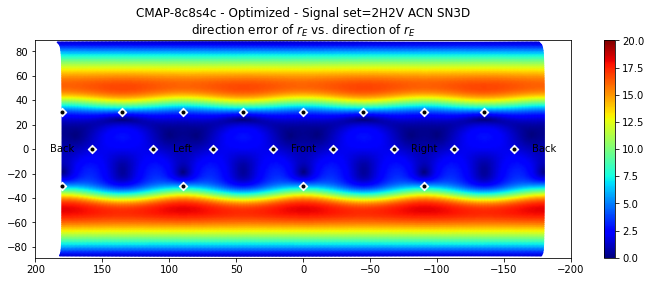

(361, 181) (361, 181) (361, 181)


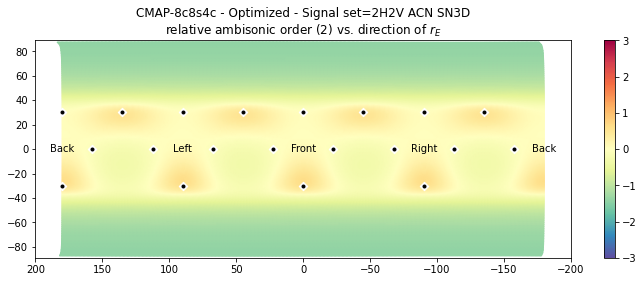

(361, 181) (361, 181) (361, 181)


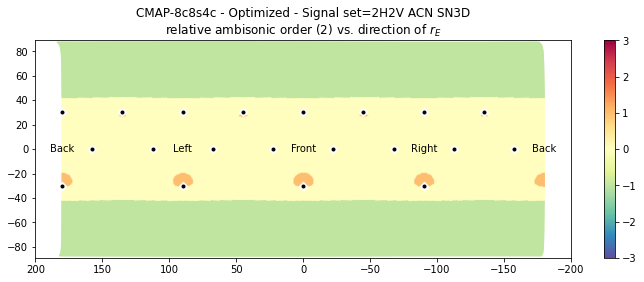

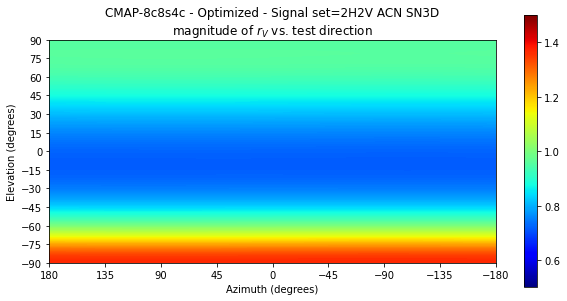

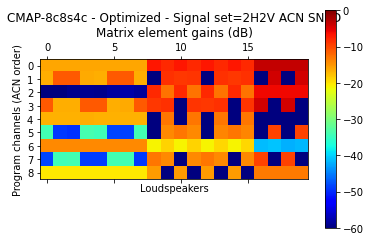

2022-12-05 12:21:16

 ambisonic_order = 2
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:   -7.11 |====================================================
M01:   -7.15 |====================================================
M02:   -7.14 |====================================================
M03:   -7.06 |====================================================
M04:   -7.10 |====================================================
M05:   -7.12 |====================================================
M06:   -7.08 |====================================================
M07:   -7.12 |====================================================
U00:   -2.38 |=========================================================
U01:   -2.06 |=========================================================
U02:   -

 This problem is unconstrained.



At iterate  250    f=  3.30749D+01    |proj g|=  2.32272D-01

At iterate  300    f=  3.30650D+01    |proj g|=  2.29395D-01

At iterate  350    f=  3.30590D+01    |proj g|=  1.15155D+00

At iterate  400    f=  3.30572D+01    |proj g|=  1.40747D-01

At iterate  450    f=  3.30570D+01    |proj g|=  7.00947D-02

At iterate  500    f=  3.30568D+01    |proj g|=  1.12697D-01

At iterate  550    f=  3.30557D+01    |proj g|=  2.50542D-01

At iterate  600    f=  3.30526D+01    |proj g|=  2.79841D-01

At iterate  650    f=  3.30502D+01    |proj g|=  7.36457D-01

At iterate  700    f=  3.30487D+01    |proj g|=  3.05044D-01

At iterate  750    f=  3.30430D+01    |proj g|=  4.45927D-01

At iterate  800    f=  3.30402D+01    |proj g|=  3.18066D-01

At iterate  850    f=  3.30389D+01    |proj g|=  9.91741D-01

At iterate  900    f=  3.30371D+01    |proj g|=  7.71901D-01

At iterate  950    f=  3.30359D+01    |proj g|=  1.39785D-01

At iterate 1000    f=  3.30349D+01    |proj g|=  2.94245D-01

At iter

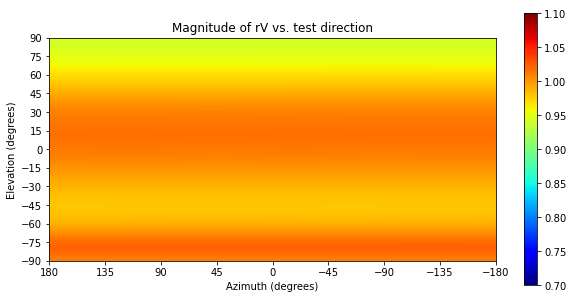

mean rV/rE direction error 3.9543550353498222


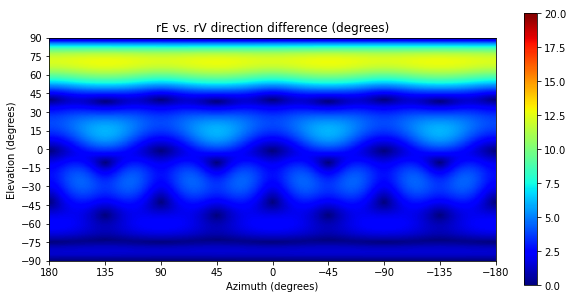

In [8]:
run_it()



 3 ------ EMB's home array, 8+8+4 : 3H1V ACN SN3D


speaker array =  CMAP-8c8s4c


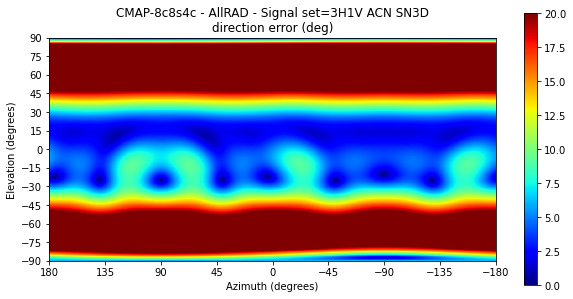

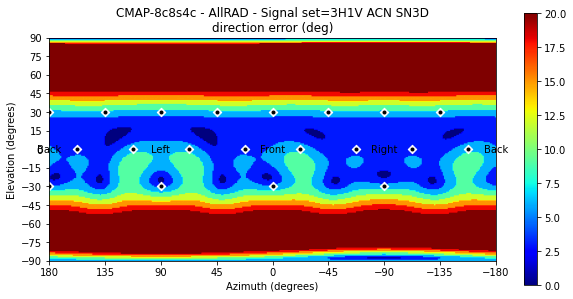

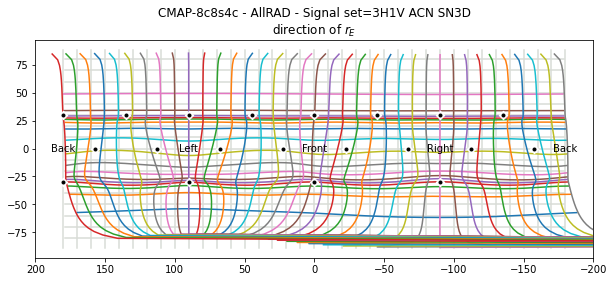

(361, 181) (361, 181) (361, 181)


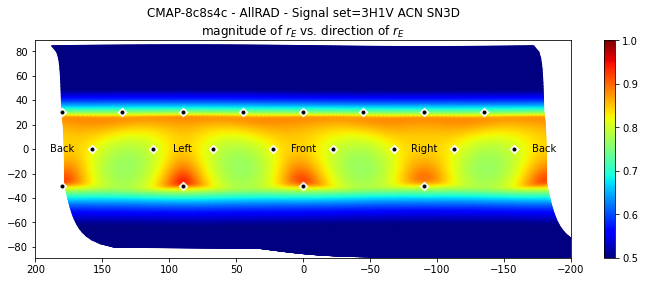

(361, 181) (361, 181) (361, 181)


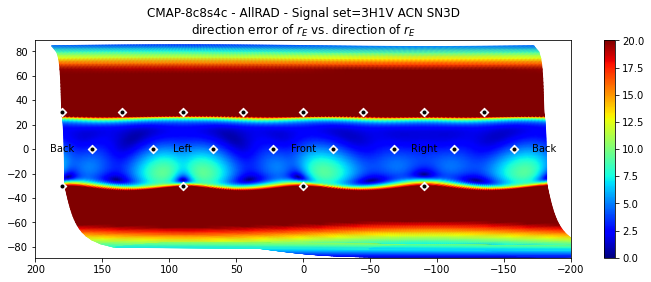

(361, 181) (361, 181) (361, 181)


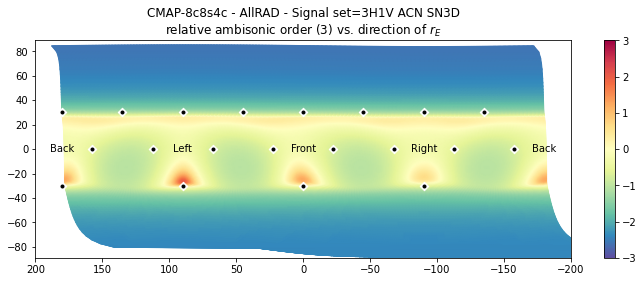

(361, 181) (361, 181) (361, 181)


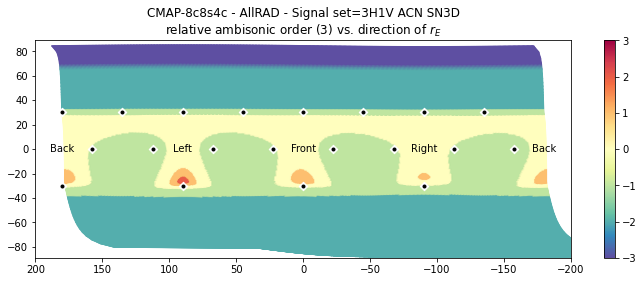

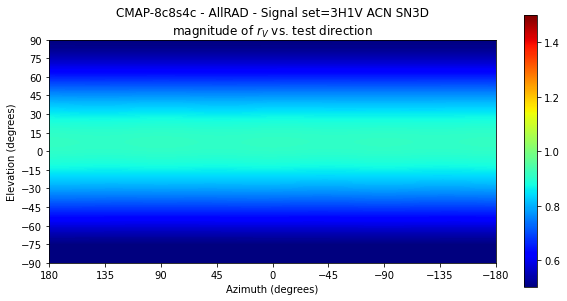

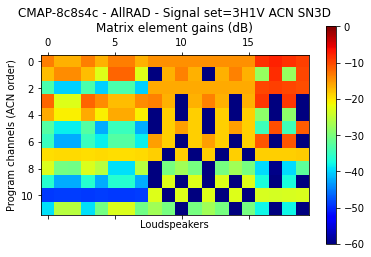



CMAP-8c8s4c - AllRAD - Signal set=3H1V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -5.15 |======================================================
M01:   -7.63 |====================================================
M02:   -7.63 |====================================================
M03:   -5.15 |======================================================
M04:   -7.63 |====================================================
M05:   -5.15 |======================================================
M06:   -5.15 |======================================================
M07:   -7.63 |====================================================
U00:   -5.16 |======================================================
U01:   -5.16 |======================================================
U02:   -5.16 |======================================================
U03:   -5.16 |======================================================
U04:   -5.16 |======================================================
U05:   -5.16 |===

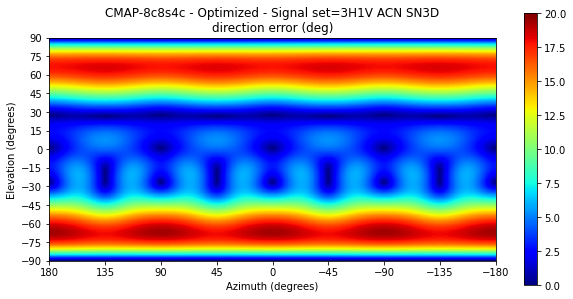

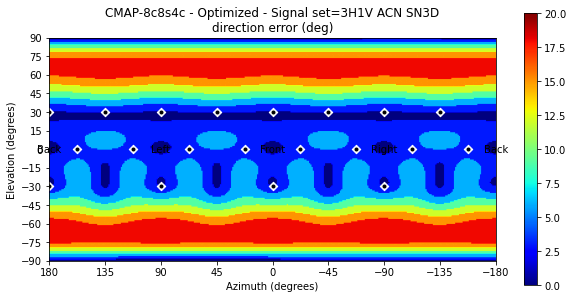

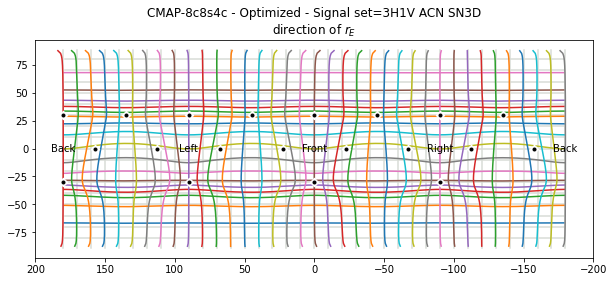

(361, 181) (361, 181) (361, 181)


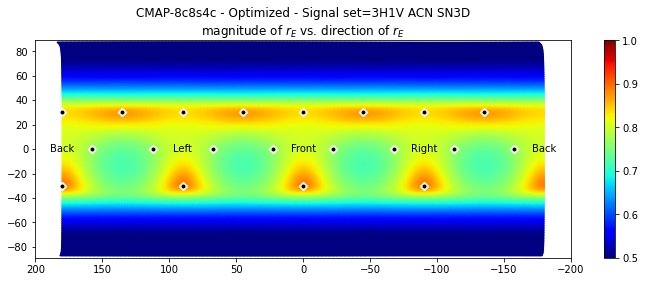

(361, 181) (361, 181) (361, 181)


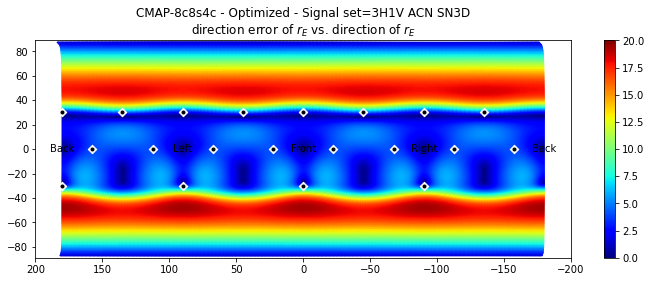

(361, 181) (361, 181) (361, 181)


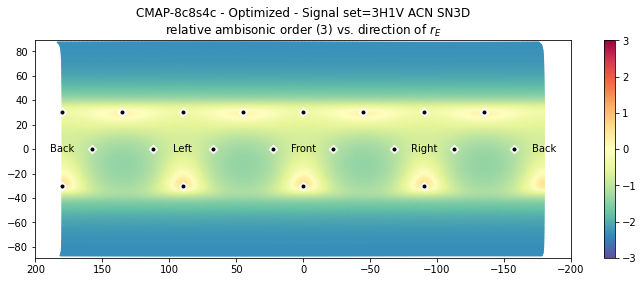

(361, 181) (361, 181) (361, 181)


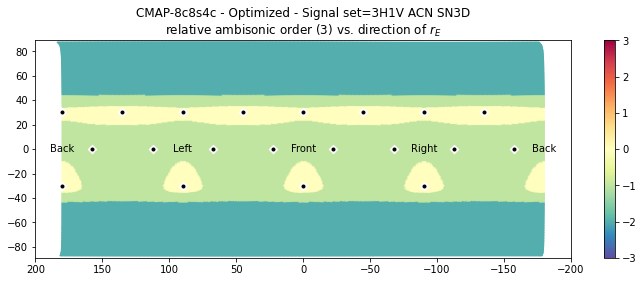

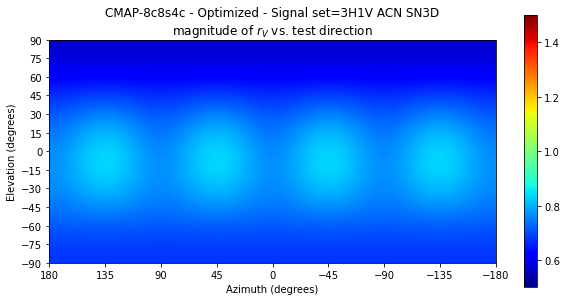

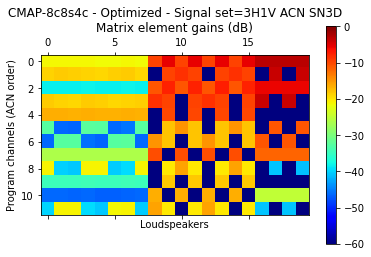

2022-12-05 12:21:37

 ambisonic_order = 3
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:  -11.63 |================================================
M01:  -11.65 |================================================
M02:  -11.74 |================================================
M03:  -11.58 |================================================
M04:  -11.75 |================================================
M05:  -11.77 |================================================
M06:  -11.65 |================================================
M07:  -11.75 |================================================
U00:   -3.03 |========================================================
U01:   -0.75 |===========================================================
U02:   -3.03 |=========================

 This problem is unconstrained.


mean rV 0.9588649923452093


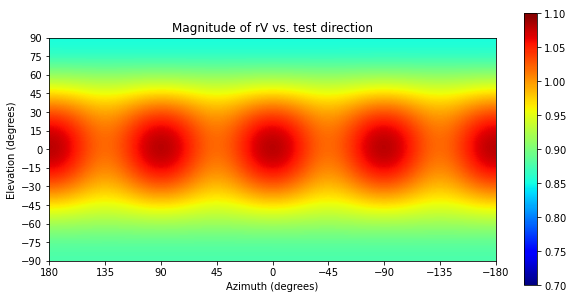

mean rV/rE direction error 6.943828315808113


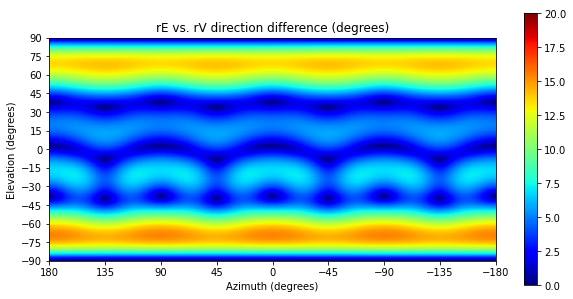

In [9]:
run_it()



 4 ------ EMB's home array, 8+8+4 : 3H2V ACN SN3D


speaker array =  CMAP-8c8s4c


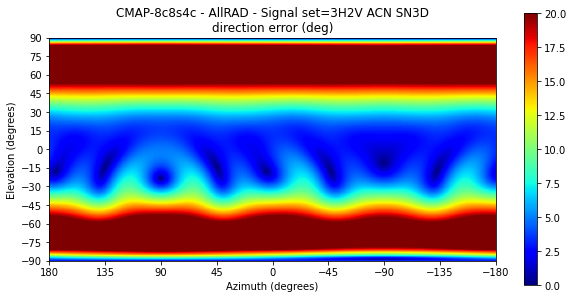

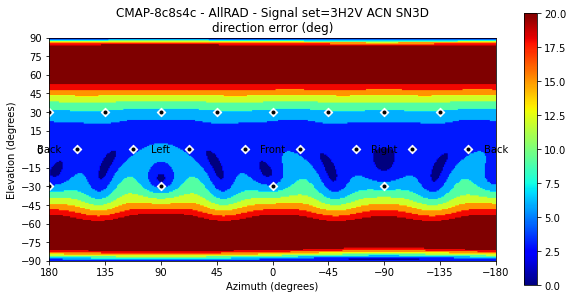

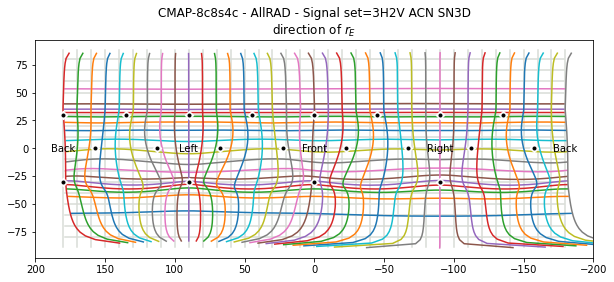

(361, 181) (361, 181) (361, 181)


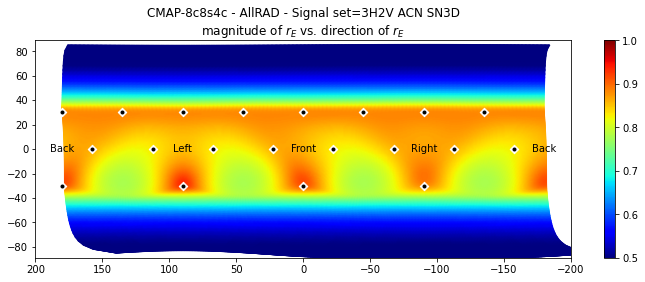

(361, 181) (361, 181) (361, 181)


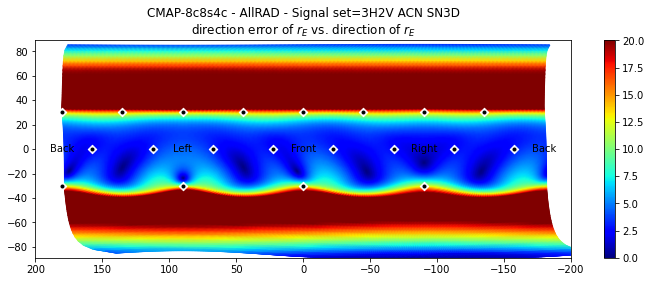

(361, 181) (361, 181) (361, 181)


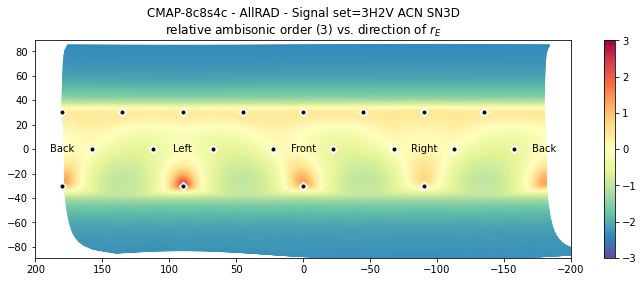

(361, 181) (361, 181) (361, 181)


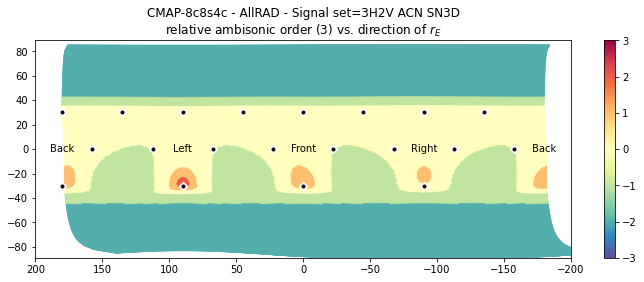

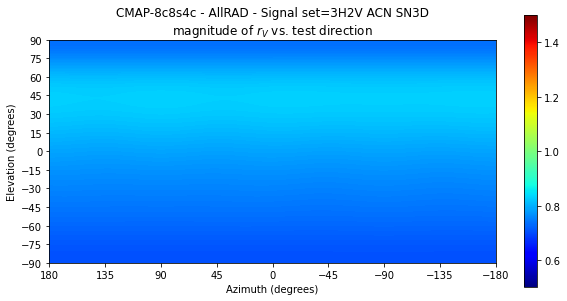

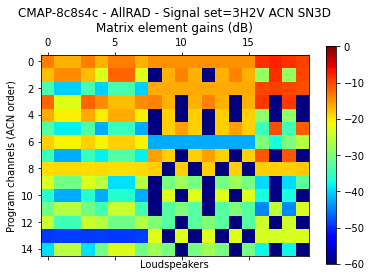



CMAP-8c8s4c - AllRAD - Signal set=3H2V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -4.10 |=======================================================
M01:   -6.47 |=====================================================
M02:   -6.47 |=====================================================
M03:   -4.10 |=======================================================
M04:   -6.47 |=====================================================
M05:   -4.10 |=======================================================
M06:   -4.10 |=======================================================
M07:   -6.47 |=====================================================
U00:   -4.99 |=======================================================
U01:   -4.99 |=======================================================
U02:   -4.99 |=======================================================
U03:   -4.99 |=======================================================
U04:   -4.99 |=======================================================
U05:

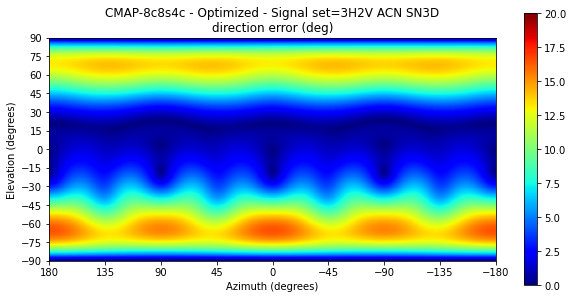

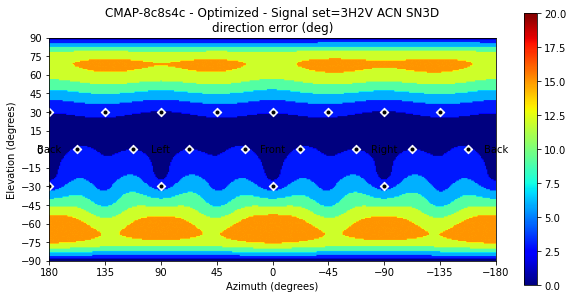

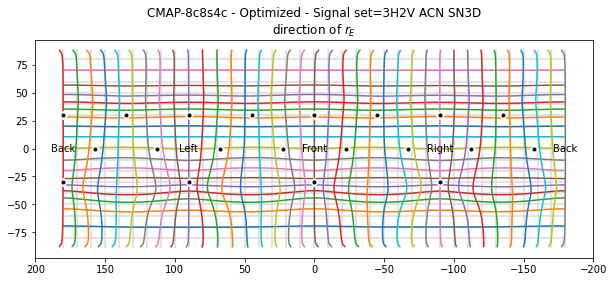

(361, 181) (361, 181) (361, 181)


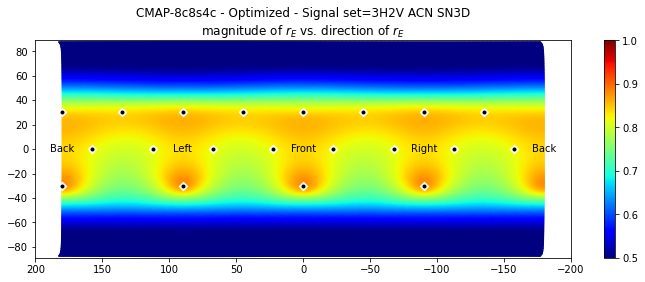

(361, 181) (361, 181) (361, 181)


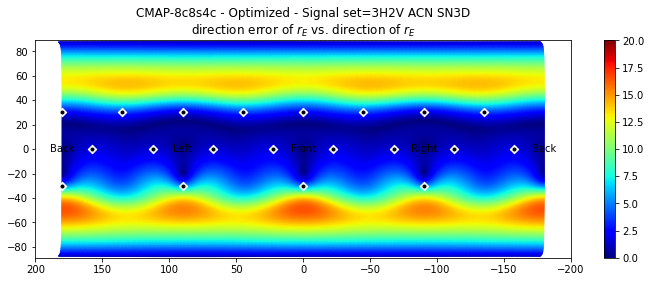

(361, 181) (361, 181) (361, 181)


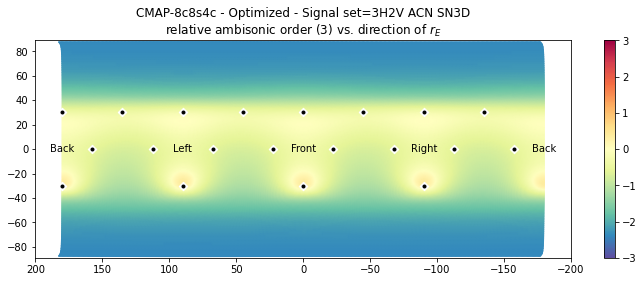

(361, 181) (361, 181) (361, 181)


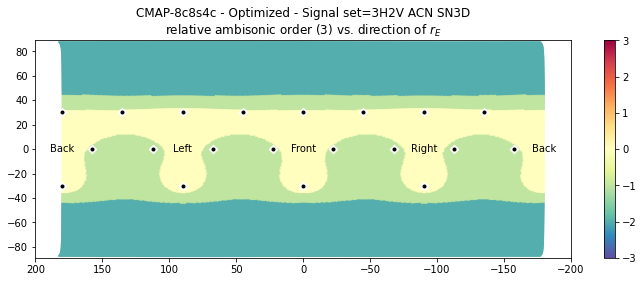

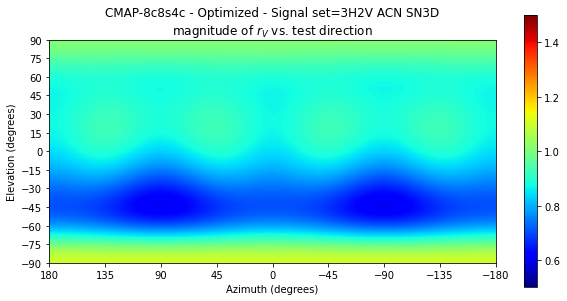

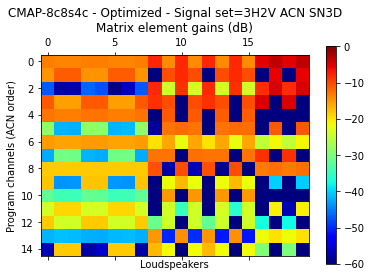

2022-12-05 12:21:59

 ambisonic_order = 3
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:   -5.38 |======================================================
M01:   -5.86 |======================================================
M02:   -5.87 |======================================================
M03:   -5.37 |======================================================
M04:   -5.38 |======================================================
M05:   -5.86 |======================================================
M06:   -5.85 |======================================================
M07:   -5.37 |======================================================
U00:   -1.76 |==========================================================
U01:   -3.15 |=================================================

 This problem is unconstrained.



At iterate  200    f=  1.73198D+01    |proj g|=  5.79685D-02

At iterate  250    f=  1.73193D+01    |proj g|=  5.41230D-02

At iterate  300    f=  1.73188D+01    |proj g|=  5.23105D-02

At iterate  350    f=  1.73180D+01    |proj g|=  1.22340D-01

At iterate  400    f=  1.73148D+01    |proj g|=  1.25007D-01

At iterate  450    f=  1.73094D+01    |proj g|=  9.60935D-02

At iterate  500    f=  1.73083D+01    |proj g|=  4.93034D-02

At iterate  550    f=  1.73077D+01    |proj g|=  4.17527D-02

At iterate  600    f=  1.73071D+01    |proj g|=  2.83178D-01

At iterate  650    f=  1.73067D+01    |proj g|=  1.95167D-01

At iterate  700    f=  1.73049D+01    |proj g|=  3.31917D-01

At iterate  750    f=  1.72989D+01    |proj g|=  7.88052D-01

At iterate  800    f=  1.72962D+01    |proj g|=  6.90507D-01

At iterate  850    f=  1.72941D+01    |proj g|=  2.44295D-01

At iterate  900    f=  1.72935D+01    |proj g|=  9.58924D-02

At iterate  950    f=  1.72933D+01    |proj g|=  7.16098D-02

At iter

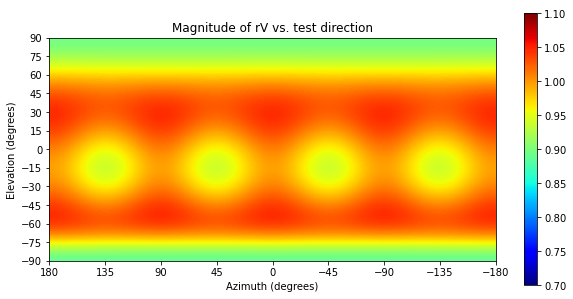

mean rV/rE direction error 2.515796563631374


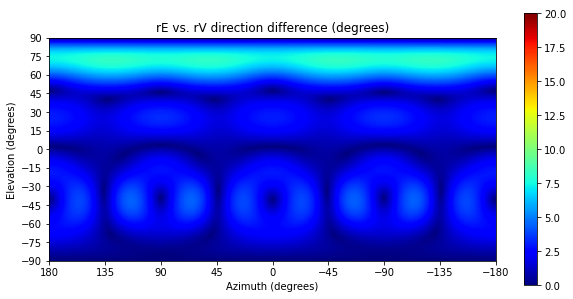

In [10]:
run_it()



 5 ------ EMB's home array, 8+8+4 : 3H3V ACN SN3D


speaker array =  CMAP-8c8s4c


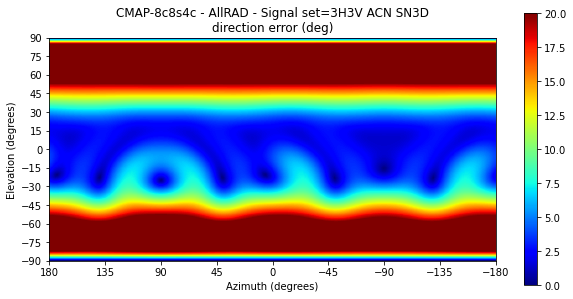

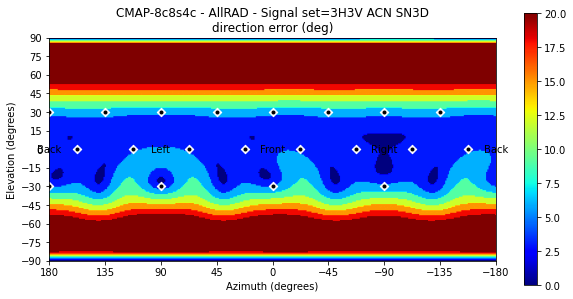

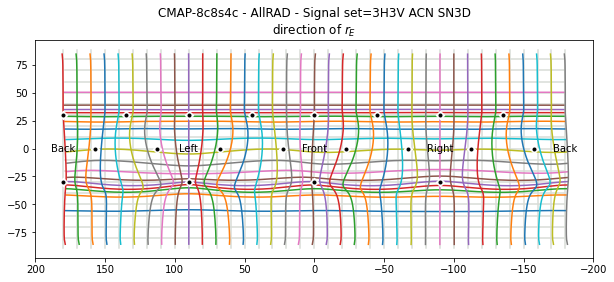

(361, 181) (361, 181) (361, 181)


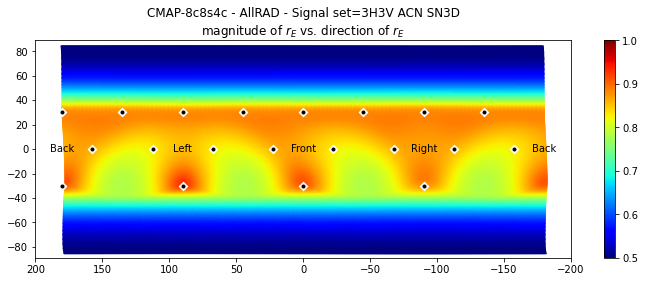

(361, 181) (361, 181) (361, 181)


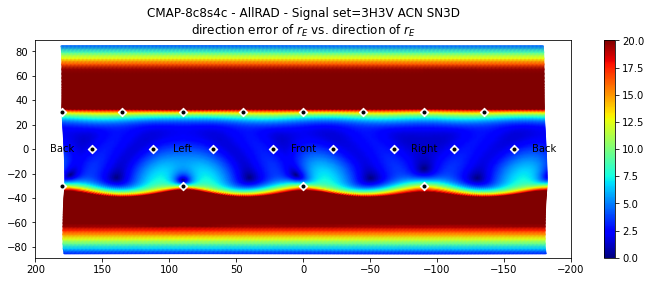

(361, 181) (361, 181) (361, 181)


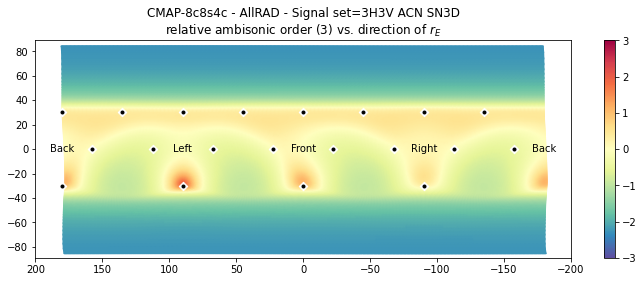

(361, 181) (361, 181) (361, 181)


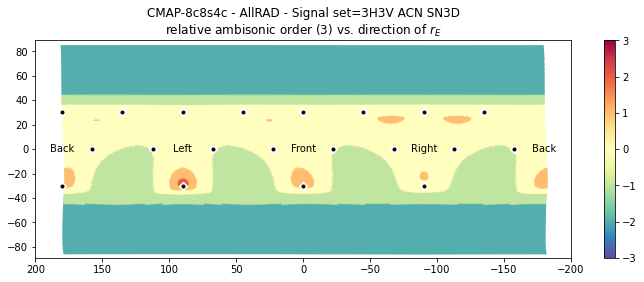

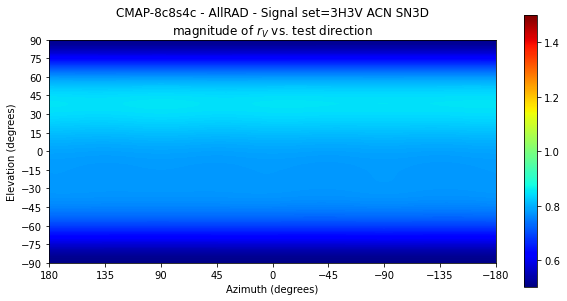

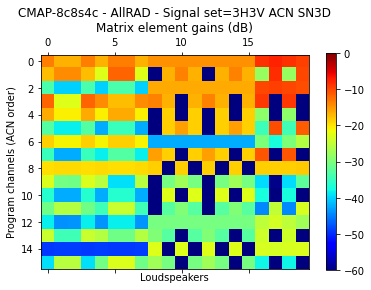



CMAP-8c8s4c - AllRAD - Signal set=3H3V ACN SN3D
Diffuse field gain of each loudspeaker (dB)
M00:   -4.08 |=======================================================
M01:   -6.46 |=====================================================
M02:   -6.46 |=====================================================
M03:   -4.08 |=======================================================
M04:   -6.46 |=====================================================
M05:   -4.08 |=======================================================
M06:   -4.08 |=======================================================
M07:   -6.46 |=====================================================
U00:   -4.86 |=======================================================
U01:   -4.86 |=======================================================
U02:   -4.86 |=======================================================
U03:   -4.86 |=======================================================
U04:   -4.86 |=======================================================
U05:

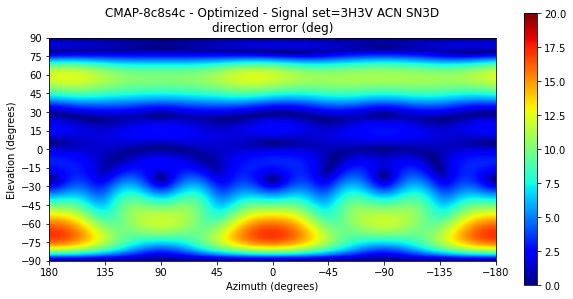

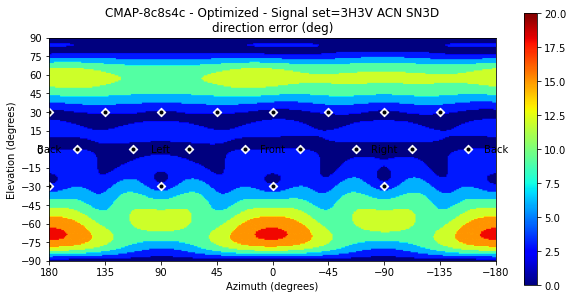

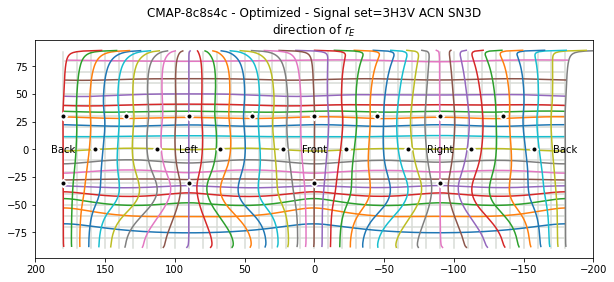

(361, 181) (361, 181) (361, 181)


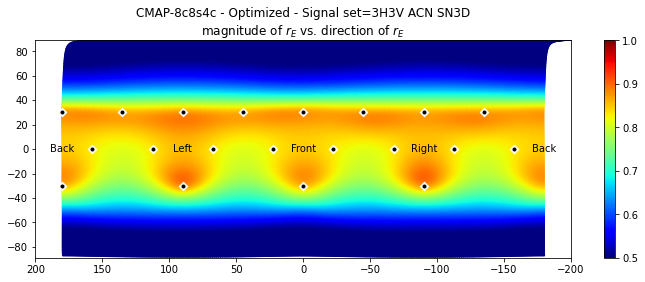

(361, 181) (361, 181) (361, 181)


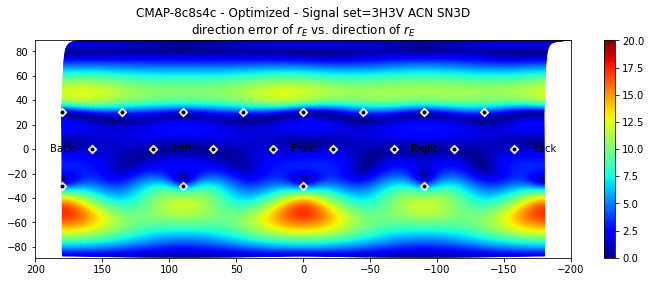

(361, 181) (361, 181) (361, 181)


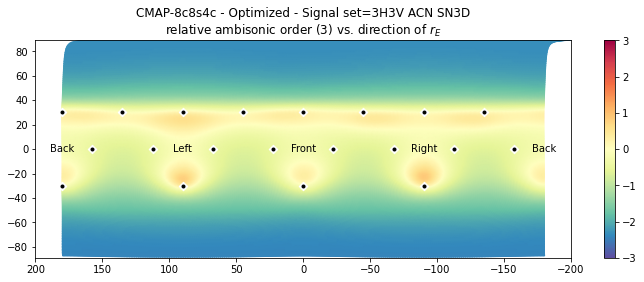

(361, 181) (361, 181) (361, 181)


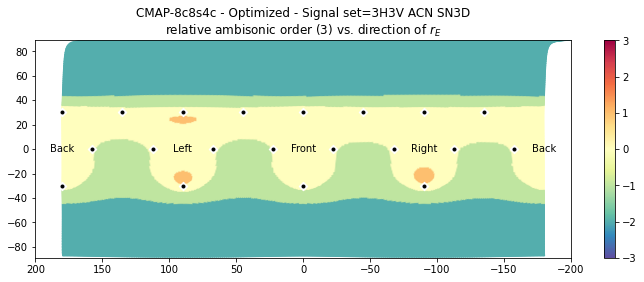

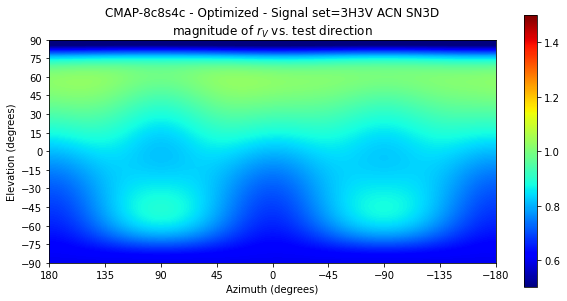

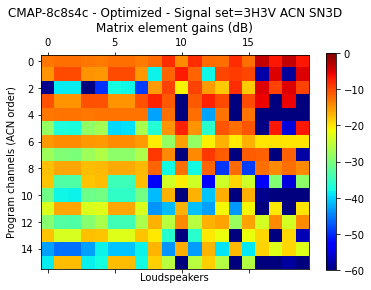

2022-12-05 12:22:22

 ambisonic_order = 3
el_lim = -60.0000 .. 60.0000
tikhonov_lambda = 0.001
sparseness_penalty = 0

Using:
 ['M00' 'M01' 'M02' 'M03' 'M04' 'M05' 'M06' 'M07' 'U00' 'U01' 'U02' 'U03'
 'U04' 'U05' 'U06' 'U07' 'L00' 'L01' 'L02' 'L03']
Turned off:
 []


Diffuse field gain of each loudspeaker (dB)
M00:   -5.09 |======================================================
M01:   -4.64 |=======================================================
M02:   -4.64 |=======================================================
M03:   -5.08 |======================================================
M04:   -5.10 |======================================================
M05:   -4.57 |=======================================================
M06:   -4.58 |=======================================================
M07:   -5.10 |======================================================
U00:   -2.76 |=========================================================
U01:   -2.56 |==============================================

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          320     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.22813D+02    |proj g|=  4.01036D+02

At iterate   50    f=  1.44247D+01    |proj g|=  1.21898D+00

At iterate  100    f=  1.43701D+01    |proj g|=  2.33863D-01

At iterate  150    f=  1.43559D+01    |proj g|=  4.06429D-01

At iterate  200    f=  1.43471D+01    |proj g|=  2.73218D-01

At iterate  250    f=  1.43421D+01    |proj g|=  5.32644D-01

At iterate  300    f=  1.43399D+01    |proj g|=  1.41239D-01

At iterate  350    f=  1.43384D+01    |proj g|=  7.56178D-02

At iterate  400    f=  1.43357D+01    |proj g|=  2.55077D-01

At iterate  450    f=  1.43198D+01    |proj g|=  5.25850D-01

At iterate  500    f=  1.43162D+01    |proj g|=  2.31962D-01

At iterate  550    f=  1.43154D+01    |proj g|=  6.79604D-02

At iterate  600    f=  1.43109D+01    |proj g|=  1.72711D-01

At iterate  650    f=  1.4

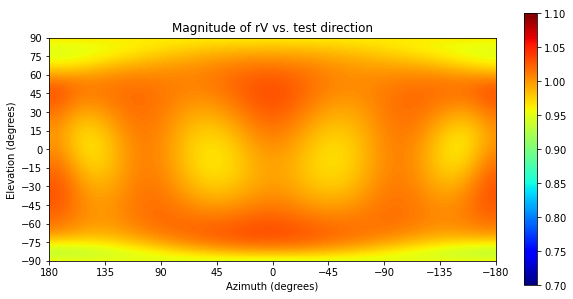

mean rV/rE direction error 2.5491205447155045


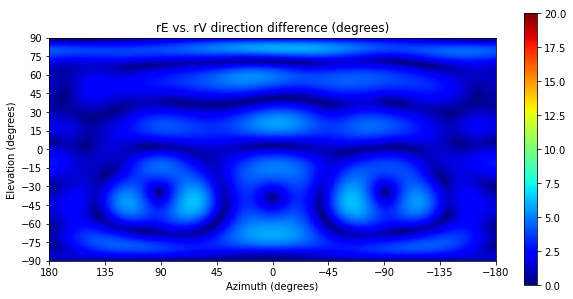

In [11]:
run_it()

In [12]:
run_it()

Done!


In [13]:
run_it()

Done!
